<a href="https://colab.research.google.com/github/Ammar-creator-cmd/DataVisualization/blob/main/VideoGame_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
url = 'https://drive.google.com/uc?id=1NI1zHuMTh6C9LY20KcM2DHBCXyHODbxH'

vg_game = pd.read_csv(url)
vg_game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
vg_game["Global_Sales"].sort_values(ascending = False)[:10]

,Global_Sales
0,82.74
1,40.24
2,35.82
3,33.00
4,31.37
5,30.26
6,30.01
7,29.02
8,28.62
9,28.31


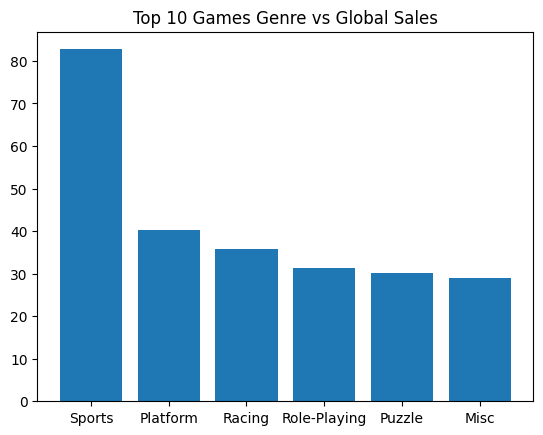

In [7]:
top_10 = vg_game[vg_game["Global_Sales"] > 28.31]
plt.bar(top_10["Genre"], top_10["Global_Sales"])
plt.title("Top 10 Games Genre vs Global Sales")
plt.show()

In [9]:
vg_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
vg_game.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [12]:
vg_game.dropna(inplace = True)

In [13]:
vg_game.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [14]:
vg_game.reset_index(drop = True, inplace = True)

In [16]:
vg_game

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [20]:
# To find out the top 10 games according to sales, we have to sort the Total_sales in descending order.
# Then we will pick up top most 10 to analyse top most sales.

In [22]:
vg_game['Total_Sales'] = vg_game[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum(axis=1)

In [23]:
vg_game["Total_Sales"].sort_values(ascending = False)[:10]

,Total_Sales
0,165.48
1,80.48
2,71.65
3,66.00
4,62.75
5,60.52
6,60.02
7,58.03
8,57.23
9,56.62


In [24]:
top_10_games = vg_game[vg_game["Total_Sales"] >= 56.62]

In [32]:
def shorten_name(name):
    return ' '.join(name.split()[:3])

vg_game['Short_Name'] = vg_game['Name'].apply(shorten_name)
display(vg_game[['Name', 'Short_Name']].head())

,Name,Short_Name
0,Wii Sports,Wii Sports
1,Super Mario Bros.,Super Mario Bros.
2,Mario Kart Wii,Mario Kart Wii
3,Wii Sports Resort,Wii Sports Resort
4,Pokemon Red/Pokemon Blue,Pokemon Red/Pokemon Blue


In [34]:
def abbreviate_short_name(name):
    abbreviations = {
        'Super': 'Sup.', 'Mario': 'Mar.', 'Bros': 'Bro.',
        'Pokemon': 'Pok.', 'Red': 'Rd.', 'Blue': 'Bl.',
        'Kart': 'Krt.', 'Wii': 'Wii.', 'Sports': 'Sprt.',
        'Resort': 'Rst.', 'Grand': 'Grd.', 'Theft': 'Tft.',
        'Auto': 'Aut.', 'Call': 'Cll.', 'Duty': 'Dty.',
        'Black': 'Blk.', 'Ops': 'Ops.', 'Modern': 'Mdrn.',
        'Warfare': 'Wrf.','League':'Lge.','Legends':'Lgnd.'
    }
    words = name.split()
    abbreviated_words = [abbreviations.get(word, word) for word in words]
    return ' '.join(abbreviated_words)

vg_game['Abbreviated_Short_Name'] = vg_game['Short_Name'].apply(abbreviate_short_name)
display(vg_game[['Name', 'Short_Name', 'Abbreviated_Short_Name']].head(10))

,Name,Short_Name,Abbreviated_Short_Name
0,Wii Sports,Wii Sports,Wii. Sprt.
1,Super Mario Bros.,Super Mario Bros.,Sup. Mar. Bros.
2,Mario Kart Wii,Mario Kart Wii,Mar. Krt. Wii.
3,Wii Sports Resort,Wii Sports Resort,Wii. Sprt. Rst.
4,Pokemon Red/Pokemon Blue,Pokemon Red/Pokemon Blue,Pok. Red/Pokemon Bl.
5,Tetris,Tetris,Tetris
6,New Super Mario Bros.,New Super Mario,New Sup. Mar.
7,Wii Play,Wii Play,Wii. Play
8,New Super Mario Bros. Wii,New Super Mario,New Sup. Mar.
9,Duck Hunt,Duck Hunt,Duck Hunt


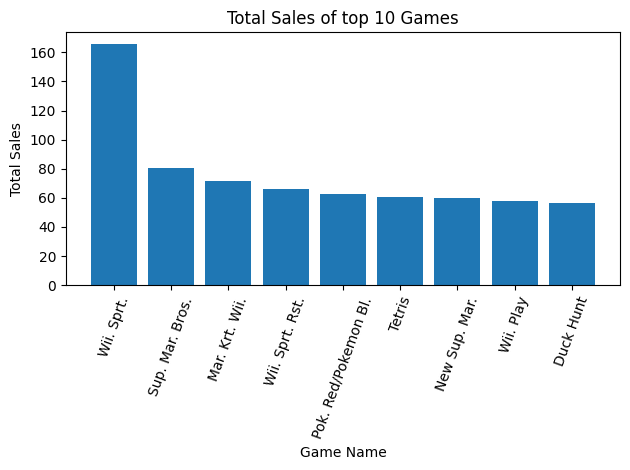

In [37]:
top_10_games = vg_game[vg_game["Total_Sales"] >= 56.62]

plt.bar(top_10_games["Abbreviated_Short_Name"], top_10_games["Total_Sales"])
plt.title("Total Sales of top 10 Games")
plt.xlabel("Game Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

#Question : How do the total sales of video games in each genre compare when considering only the platforms PC, PS3, PS4, and X360?


In [38]:
vg_game

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales,Short_Name,Abbreviated_Short_Name
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,165.48,Wii Sports,Wii. Sprt.
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80.48,Super Mario Bros.,Sup. Mar. Bros.
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,71.65,Mario Kart Wii,Mar. Krt. Wii.
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,66.00,Wii Sports Resort,Wii. Sprt. Rst.
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,62.75,Pokemon Red/Pokemon Blue,Pok. Red/Pokemon Bl.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.02,Woody Woodpecker in,Woody Woodpecker in
16287,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.02,Men in Black,Men in Blk.
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.01,SCORE International Baja,SCORE International Baja
16289,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.02,Know How 2,Know How 2


In [40]:
values = ["PC", "XBOBX360", "PS3", "PS4"]
pc_and_ps_games = vg_game[vg_game["Platform"].isin(values)]
pc_and_ps_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales,Short_Name,Abbreviated_Short_Name
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,42.79,Grand Theft Auto,Grd. Tft. Aut.
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,28.48,Call of Duty:,Cll. of Duty:
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03,28.07,Call of Duty:,Cll. of Duty:
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46,26.93,Call of Duty:,Cll. of Duty:
40,41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73,25.46,Call of Duty:,Cll. of Duty:
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16259,16569,End of Nations,PC,2012.0,Strategy,Trion Worlds,0.01,0.00,0.00,0.00,0.01,0.02,End of Nations,End of Nations
16263,16573,Farming 2017 - The Simulation,PS4,2016.0,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01,0.02,Farming 2017 -,Farming 2017 -
16270,16580,Damnation,PC,2009.0,Shooter,Codemasters,0.00,0.01,0.00,0.00,0.01,0.02,Damnation,Damnation
16278,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,0.02,Breach,Breach


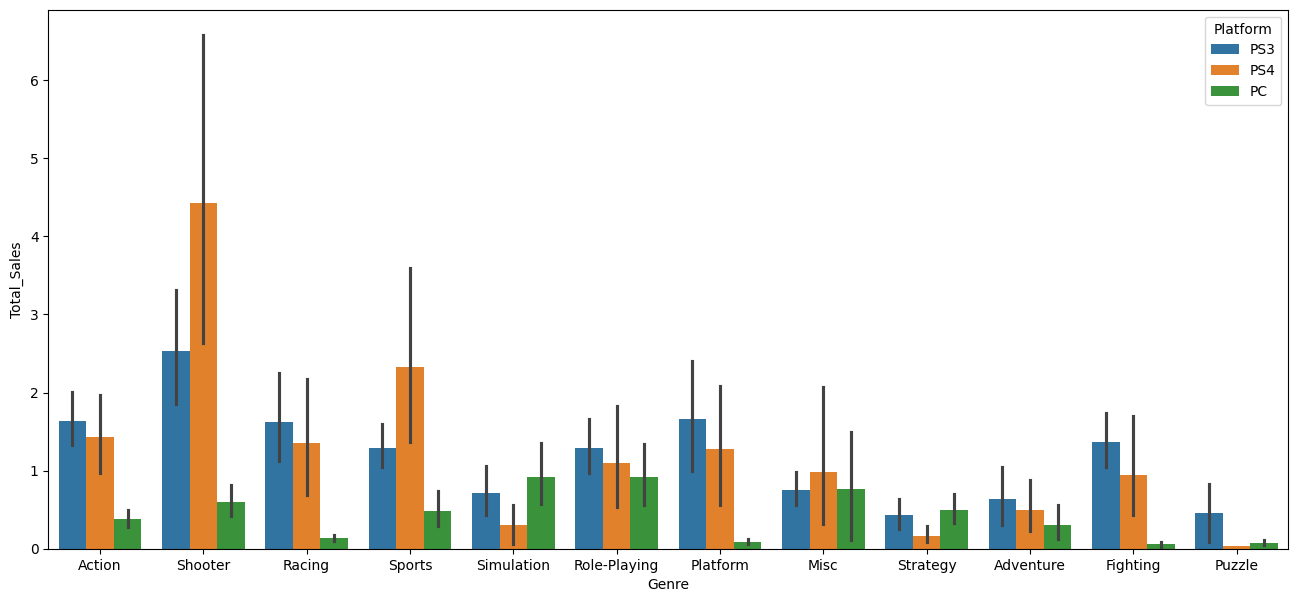

In [42]:
plt.figure(figsize = (16, 7))
sns.barplot(data = pc_and_ps_games, x = "Genre", y = "Total_Sales", hue = "Platform")
plt.show()